In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
eps=0.00001
x=np.array([0.99957677, 0.999978389])
funk=0
grad=0
ges=0
it=0
iter=0
alif=200
def roz(x):
  global funk
  funk+=1
  return alif*(x[0]**2-x[1])**2+(x[0]-1)**2

def squ(x):
  global funk
  funk+=1
  return 5*x[0]*x[0] + 4*x[0]*x[1]+2*x[1]*x[1]+4*math.sqrt(5)*(x[0]+x[1])-14
def gold(epsg,point,roz,antigr):
    a=5
    b=-5
    delt=(b-a)*(math.sqrt(5)-2)/2
    x1=(a+b)/2 -delt
    x2=(a+b)/2 +delt
    f1=roz(point + x1 * antigr)
    f2=roz(point + x2 * antigr)
    while(math.fabs(b-a)>=epsg):
        if(f1<f2):
            b=x2
            x2=x1
            x1=a+b-x2
            f2=f1
            f1=roz(point + x1 * antigr)
        else:
            a=x1
            x1=x2
            x2=a+b-x1
            f1=f2
            f2=roz(point + x2 * antigr)
        delt=(b-a)*(math.sqrt(5)-2)/2
    return (a+b)/2

def norm(x):
    nor=0
    for i in range(2):
        nor +=x[i]*x[i]
    return math.sqrt(nor)
def pokoor(x0,f):
  global unsv1
  unsv1.append(x0)
  k=0
  e1=np.array([1,0])
  e2=np.array([0,1])
  cappa1=gold(eps/100,x0,f,e1)
  cappa2=gold(eps/100,x0,f,e2)
  x=x0+cappa1*e1+cappa2*e2
  unsv1.append(x)
  while(abs(f(x)-f(x0))>eps or norm(x-x0)>eps):#abs(f(x)-f(x0))>eps and
    k+=1
    x0=x
    cappa1=gold(eps/100,x0,f,e1)
    cappa2=gold(eps/100,x0 + cappa1*e1,f,e2)
    x=x0+cappa1*e1+cappa2*e2
    unsv1.append(x)
    if(k>10000):
      break
  print(k)
  return x
def hook(x0,f):
  global unsv2
  unsv2.append(x0)
  k=0
  e1=np.array([1,0])
  e2=np.array([0,1])
  cappa1=gold(eps/10,x0 ,f,e1)
  cappa2=gold(eps/10,x0+ cappa1*e1,f,e2)
  e3=cappa1*e1+cappa2*e2-x0
  cappa3=gold(eps/10,x0+ cappa1*e1+cappa2*e2,f,e3)#+ cappa1*e1+cappa2*e2
  x=x0+cappa1*e1+cappa2*e2+ cappa3*e3
  unsv2.append(x)
  while(abs(f(x)-f(x0))>eps or norm(x-x0)>eps or k<100):
    k+=1
    x0=x
    cappa1=gold(eps/10,x0 ,f,e1)
    cappa2=gold(eps/10,x0+ cappa1*e1,f,e2)#+ cappa1*e1
    e3=cappa1*e1+cappa2*e2-x0
    cappa3=gold(eps/10,x0+ cappa1*e1+cappa2*e2,f,e3)#+ cappa1*e1+cappa2*e2
    x=x0+ cappa3*e3+ cappa1*e1+cappa2*e2
    unsv2.append(x)
    if(k>10000):
      break
  print(k)
  return x

def rozen(x0,f):
  global unsv3
  unsv3.append(x0)
  k=0
  e1=np.array([1,0])
  e2=np.array([0,1])
  cappa1=gold(eps/100,x0 ,f,e1)
  cappa2=gold(eps/100,x0+ cappa1*e1,f,e2)
  x=x0+cappa1*e1+cappa2*e2
  unsv3.append(x)
  ek1=cappa1*e1+cappa2*e2
  ek2 = e2 - (np.dot(e2, ek1)/ np.dot(ek1, ek1)) * ek1;
  while(abs(f(x)-f(x0))>eps or norm(x-x0)>eps or k<111):
    k+=1
    x0=x
    e1=ek1
    e2=ek2
    cappa1=gold(eps/100,x0 ,f,e1)
    cappa2=gold(eps/100,x0+ cappa1*e1,f,e2)
    x=x0+cappa1*e1+cappa2*e2
    unsv3.append(x)
    ek1=cappa1*e1+cappa2*e2
    ek2 = e2 - (np.dot(e2, ek1)/ np.dot(ek1, ek1)) * ek1;
  print(k)
  return x

def paul(x0,f):
  global unsv4,x
  unsv4.append(x0)
  k=0
  e1=np.array([1,0])
  e2=np.array([0,1])
  cappa1=gold(eps/100,x0 ,f,e1)
  cappa2=gold(eps/100,x0+ cappa1*e1,f,e2)
  e3=cappa1*e1+cappa2*e2#x-x0
  cappa13=gold(eps/100,x0+e3,f,e2)
  cappa3=gold(eps/10,x0+e3+cappa13*e2,f,e3)#+ cappa1*e1+cappa2*e2
  xp=x0+e3+cappa3*e3 +cappa13*e2#+cappa1*e1+cappa2*e2
  unsv4.append(x)
  while(abs(f(xp)-f(x0))>eps or norm(xp-x0)>eps or k<10):# or norm(x-x0)>eps
    k+=1
    e1=e3
    e2=cappa3*e3 +cappa13*e2
    x0=xp
    cappa1=gold(eps/100,x0 ,f,e1)
    cappa2=gold(eps/100,x0+ cappa1*e1,f,e2)#+ cappa1*e1
    e3=cappa1*e1+cappa2*e2#x-x0
    cappa13=gold(eps/100,x0+e3,f,e2)
    cappa3=gold(eps/100,x0+e3+cappa13*e2,f,e3)##+cappa1*e1+cappa2*e2
    xp=x0+e3+cappa3*e3 + cappa13*e2
    unsv4.append(xp)
    if(k>200):
      break
  print(k)
  if(f([1,1])<eps):
    return x



x0=np.array([-1,-2])
unsv1=[]
unsv2=[]
unsv3=[]
unsv4=[]
print(pokoor(x0,roz))
print(hook(x0,roz))
print(rozen(x0,roz))
print(paul(x0,roz))


2
[1.00000001 0.99999995]
1107
[0.99874225 0.99748002]
111
[1.         0.99999999]
10
[0.99957677 0.99997839]


<a list of 45 text.Text objects>

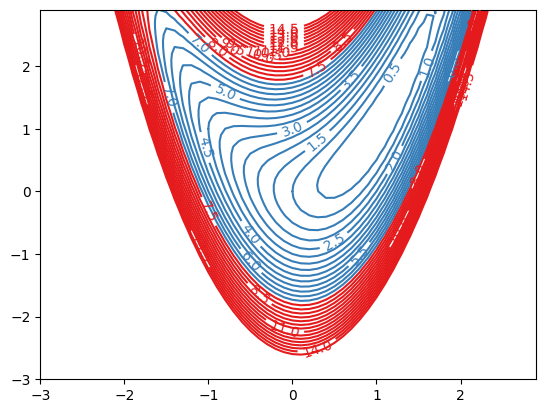

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 2*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)


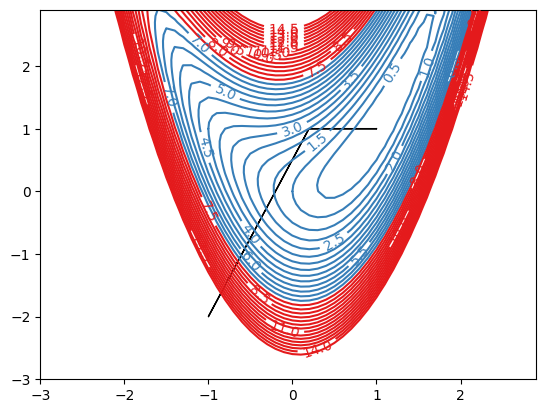

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')


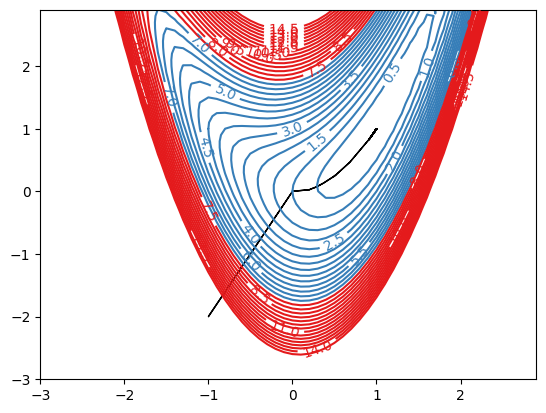

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')


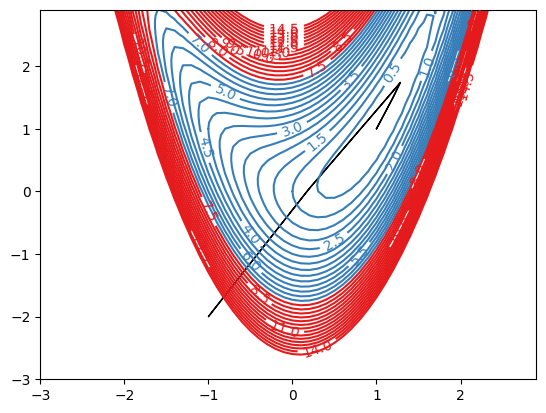

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv3:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')


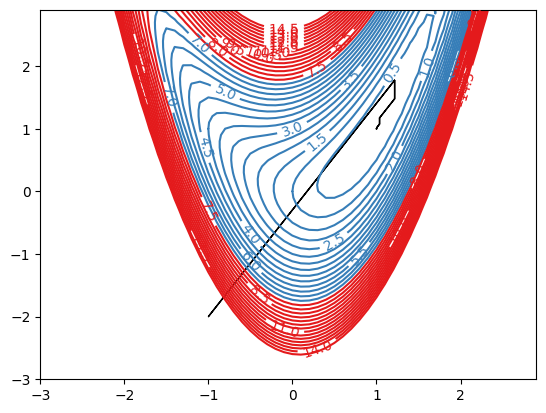

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv4:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')


<a list of 95 text.Text objects>

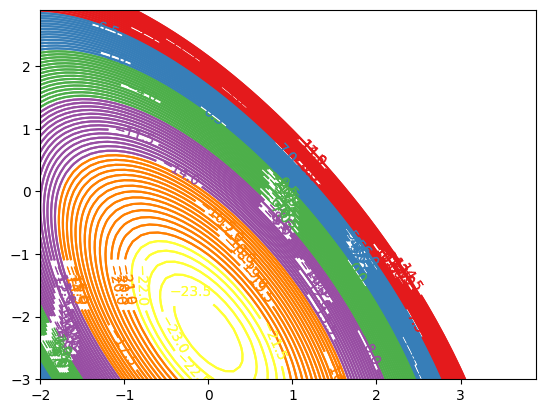

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 5*z[0]*z[0] + 4*z[0]*z[1]+2*z[1]*z[1]+4*math.sqrt(5)*(z[0]+z[1])-14

X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-2.0, 4.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

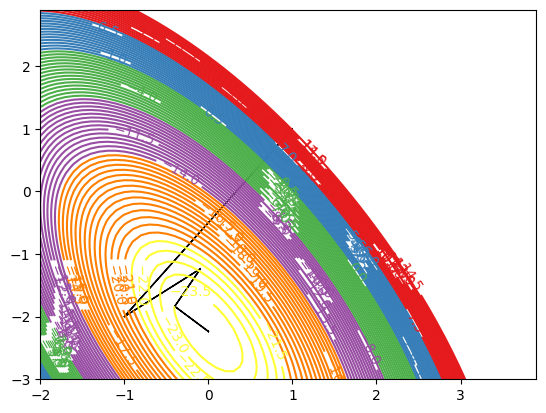

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(3,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

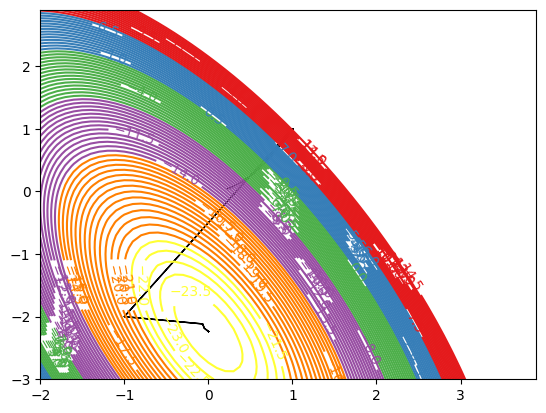

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(4,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

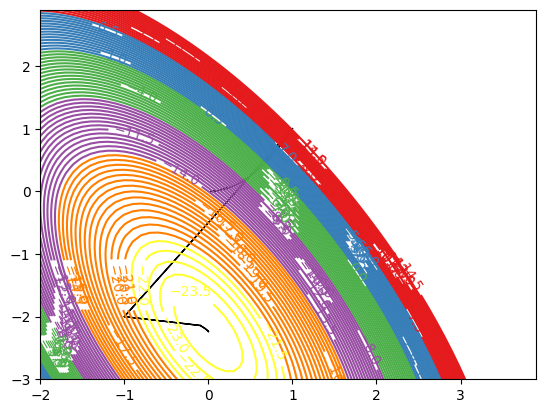

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv3:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(3,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

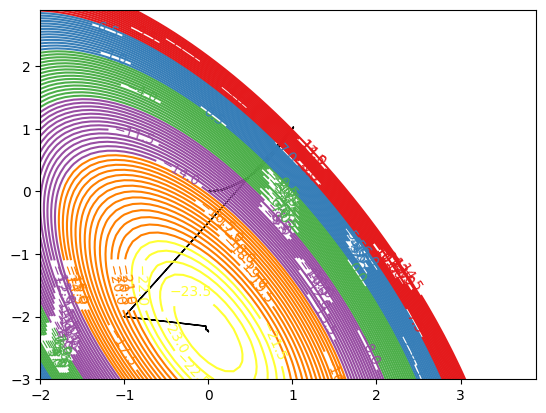

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv4:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(3,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

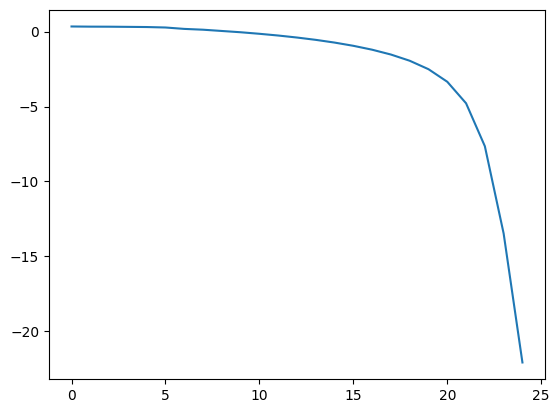

In [ ]:
k=np.arange(0,len(unsv3)-2,1)
s=[]
for i in range(2,len(unsv3)):
  unsv3[i][0]-=1
  unsv3[i][1]-=1
  s.append(norm(unsv3[i]))

plt.plot(k,np.log(s))
#plt.scatter(np.log(k),log ,color = 'y')
plt.show()

In [ ]:
def hook(x0,f):
  global unsv2
  unsv2.append(x0)
  k=0
  e1=np.array([1,0])
  e2=np.array([0,1])
  cappa1=gold(eps/10,x0 ,f,e1)
  cappa2=gold(eps/10,x0+ cappa1*e1,f,e2)
  e3=cappa1*e1+cappa2*e2-x0
  cappa3=gold(eps/10,x0+ cappa1*e1+cappa2*e2,f,e3)#+ cappa1*e1+cappa2*e2
  x=x0+ cappa3*e3+cappa1*e1+cappa2*e2
  unsv2.append(x)
  while(abs(f(x)-f(x0))>eps or norm(x-x0)>eps):
    k+=1
    x0=x
    cappa1=gold(eps/100,x0 ,f,e1)
    cappa2=gold(eps/100,x0+ cappa1*e1,f,e2)
    e3=cappa1*e1+cappa2*e2-x0
    cappa3=gold(eps/100,x0+ cappa1*e1+cappa2*e2,f,e3)#+ cappa1*e1+cappa2*e2
    x=x0+ cappa3*e3+cappa1*e1+cappa2*e2
    unsv2.append(x)
    if(k>10000):
      break
  print(k)
  return x